In [1]:
# display and plotting imports

import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


In [2]:
import IPython.display as ipd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline


### cats-train-convert-spectrograms ###

In [3]:
path = os.getcwd()
file_name = '/Users/estebanzuniga/Project-5/cats_dogs/train/cat/'
new_path = os.path.join(path, file_name)
os.chdir(new_path)

In [4]:
cats = os.listdir('/Users/estebanzuniga/Project-5/cats_dogs/train/cat/')


In [5]:
cats.index('cat_116.wav')

119

In [6]:
max(cats)

'cat_99.wav'

In [7]:
cats.pop(19)

'.DS_Store'

In [11]:
duration_of_sound = len(cats)/ sr
print(duration_of_sound, 'seconds')

0.005668934240362812 seconds


In [9]:
ipd.Audio(cats[99])

In [10]:
cat_99 , sr = librosa.load(cats[99])
len(cat_99)

264600

In [12]:
cat_20, sr = librosa.load(cats[20])
len(cats), sr

(125, 22050)

In [13]:
sample_duration = 1 / sr
print(f'duration of 1 sample is:{sample_duration: 6f} seconds')

duration of 1 sample is: 0.000045 seconds


In [14]:
duration = sample_duration * len(cat_99)
print(f'duration of signal is: {duration: 2f} seconds')

duration of signal is:  12.000000 seconds


In [15]:
duration = sample_duration * len(cat_20)
print(f'duration of signal is: {duration: 2f} seconds')

duration of signal is:  1.253968 seconds


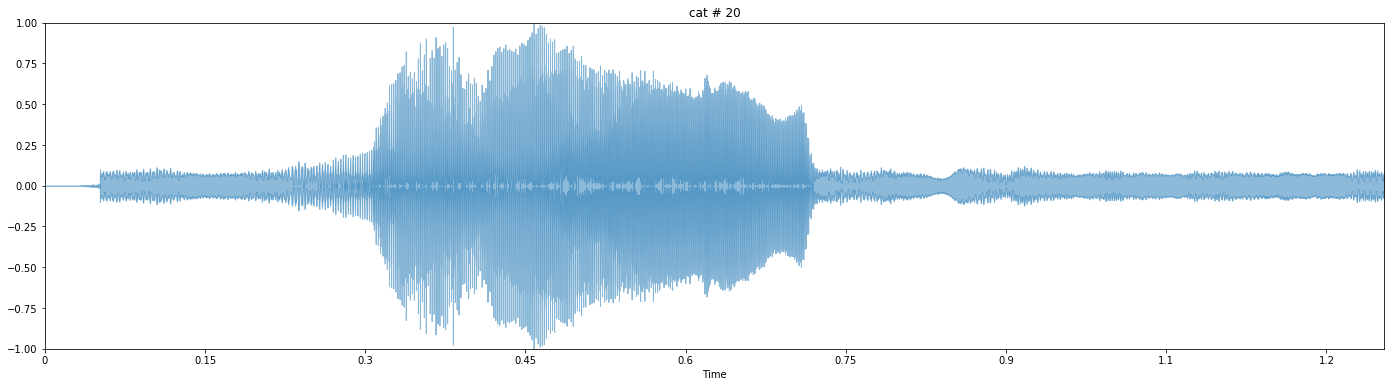

In [16]:
plt.figure(figsize=(24,6))
librosa.display.waveplot(cat_20, alpha = .5)
plt.title('cat # 20')
plt.ylim(-1, 1)

plt.show()

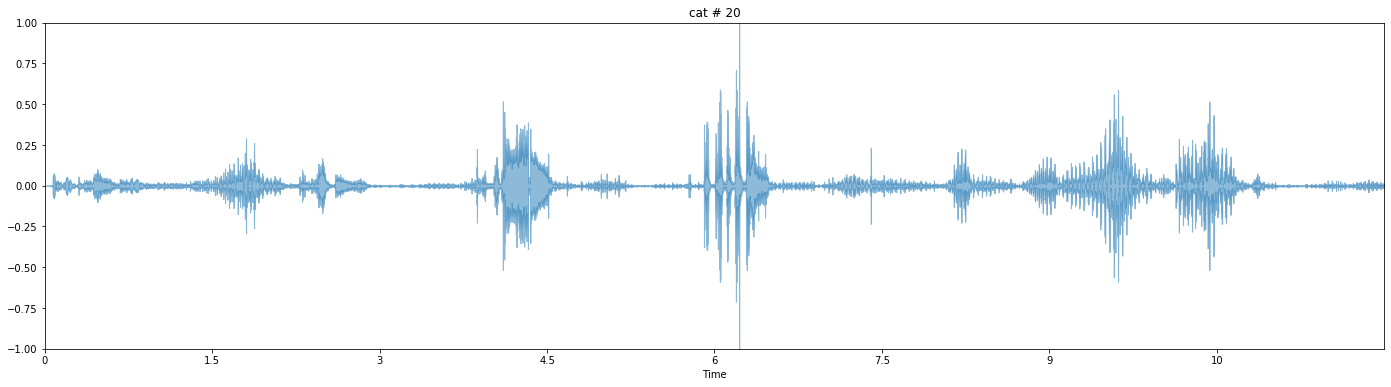

In [17]:
plt.figure(figsize=(24,6))
librosa.display.waveplot(cat_99, alpha = .5)
plt.title('cat # 20')
plt.ylim(-1, 1)

plt.show()

In [25]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
def amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[sample: sample + frame_size]) for sample in range(0, signal.size, hop_length)])


In [26]:
ae_cat_99 = amplitude_envelope(cat_99, FRAME_SIZE, HOP_LENGTH)
len(ae_cat_99)

517

In [27]:
ae_cat_20 = amplitude_envelope(cat_20, FRAME_SIZE, HOP_LENGTH)
len(ae_cat_20)

55

In [28]:
frames = range(0, ae_cat_20.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

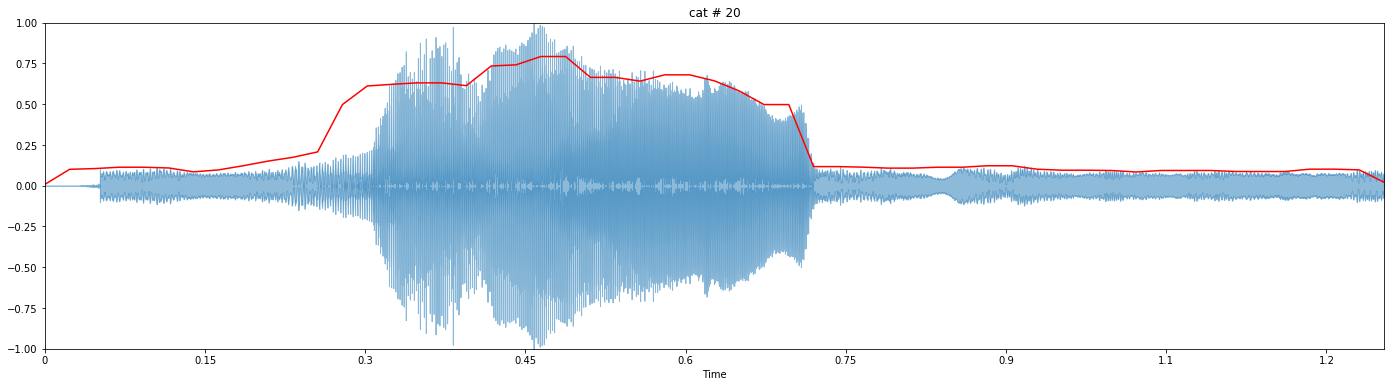

In [29]:
plt.figure(figsize=(24,6))
librosa.display.waveplot(cat_20, alpha = .5)
plt.plot(t, ae_cat_20, color = 'r' )
plt.title('cat # 20')
plt.ylim(-1, 1)

plt.show()

In [30]:
frames = range(0, ae_cat_99.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

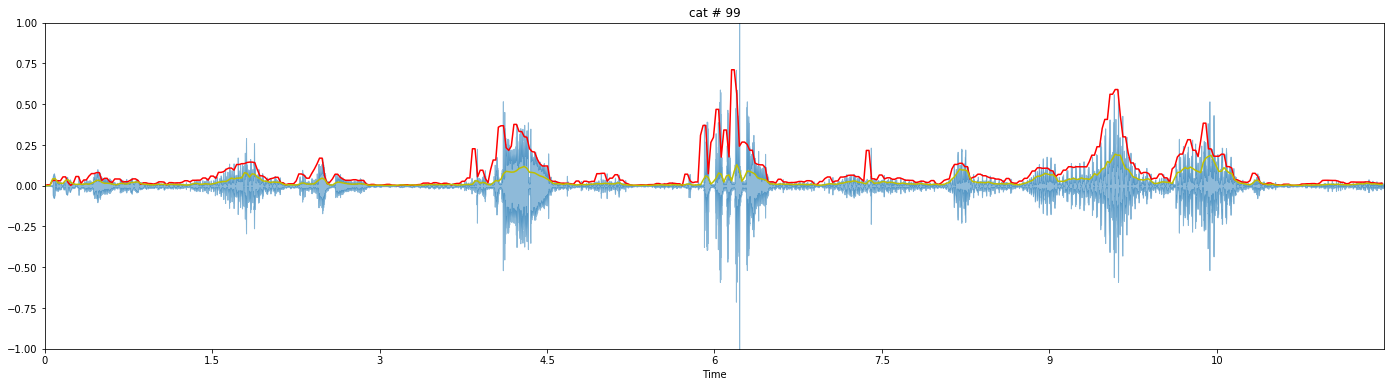

In [57]:
plt.figure(figsize=(24,6))
librosa.display.waveplot(cat_99, alpha = .5)
plt.plot(t, ae_cat_99, color = 'r' )
plt.plot(t, rms_cat_99, color = 'y' )
plt.title('cat # 99')
plt.ylim(-1, 1)
plt.show()

In [51]:
cat_99, _ = librosa.load(cats[99])
FRAME_LENGTH = 1024
HOP_LENGTH = 512
rms_cat_99 = librosa.feature.rms(cat_99, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]

In [52]:
rms_cat_99.shape

(517,)

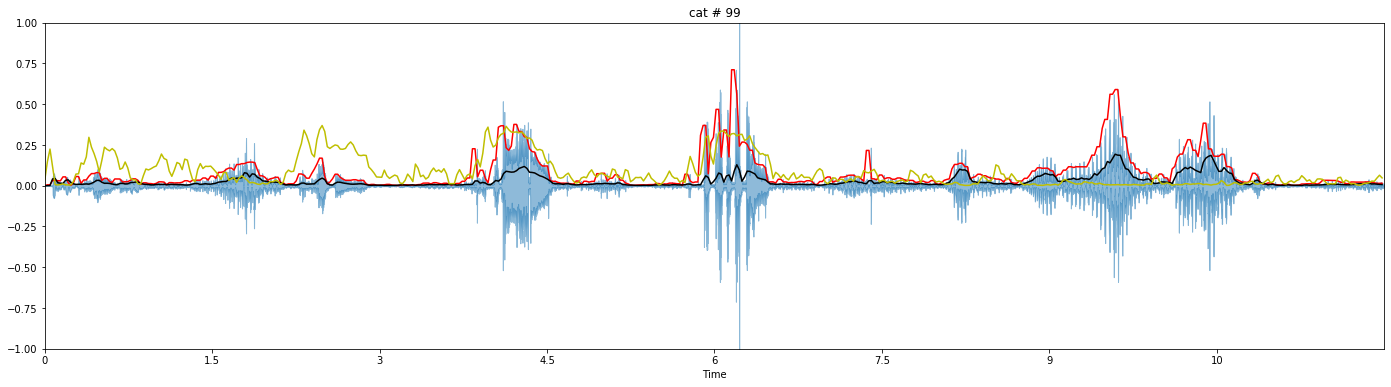

In [62]:
frames = range(0, rms_cat_99.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

plt.figure(figsize=(24,6))
librosa.display.waveplot(cat_99, alpha = .5)
plt.plot(t, ae_cat_99, color = 'r' )
plt.plot(t, rms_cat_99, color = 'black' )
plt.plot(t, zcr_cat_99, color = 'y')
plt.title('cat # 99')
plt.ylim(-1, 1)
plt.show()







In [59]:
cat_99, _ = librosa.load(cats[99])
FRAME_LENGTH = 1024
HOP_LENGTH = 512
zcr_cat_99 = librosa.feature.zero_crossing_rate(cat_99, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]

In [58]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.savefig('/Users/estebanzuniga/Project-5/cat-image-1/cats1.png')

NameError: name 'x' is not defined

In [13]:
import warnings
warnings.filterwarnings('ignore')

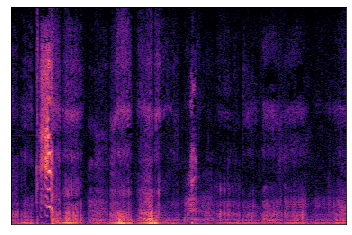

In [13]:
for cat in cats:
    x, sr = librosa.load(cat, sr = None)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr)
    plt.savefig('/Users/estebanzuniga/Project-5/original_data_specs//{}.png'.format(cat[:-4]))
    
        

### dogs-train-convert-spectrograms ###

In [13]:
path = os.getcwd()
file_name = '/Users/estebanzuniga/Project-5/cats_dogs/train/dog/'
new_path = os.path.join(path, file_name)
os.chdir(new_path)

In [22]:
 dogs = os.listdir('/Users/estebanzuniga/Project-5/cats_dogs/train/dog/')

In [23]:
dogs[:5]

['dog_barking_63.wav',
 'dog_barking_77.wav',
 'dog_barking_88.wav',
 'dog_barking_76.wav',
 'dog_barking_74.wav']

In [25]:
cats[:5]

['cat_74.wav', 'cat_60.wav', 'cat_48.wav', 'cat_132.wav', 'cat_127.wav']

In [18]:
x2, sr2 = librosa.load(dogs[0], sr = None)
len(x), sr

(190400, 16000)

Text(0, 0.5, 'amplitude')

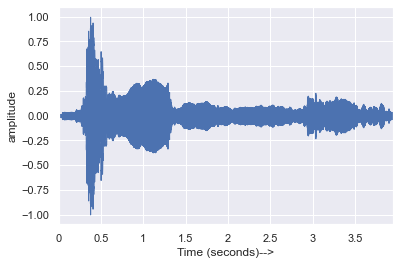

In [37]:
plt.figure()
librosa.display.waveplot(x2, sr = sr2)
plt.xlabel("Time (seconds)-->")
plt.ylabel("amplitude")

In [8]:
ipd.Audio(dogs[0])

NameError: name 'dogs' is not defined

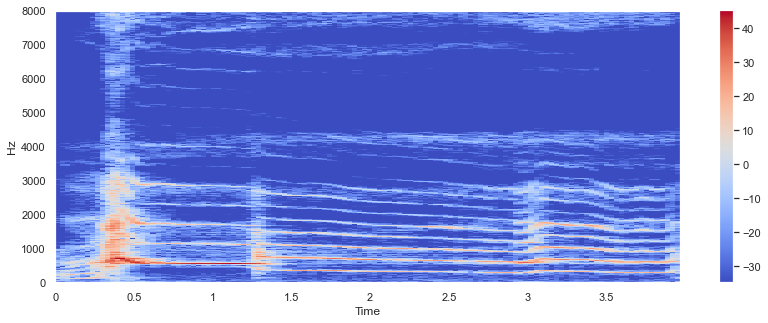

In [18]:
X2 = librosa.stft(x2)
Xdb2 = librosa.amplitude_to_db(abs(X2))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb2, sr=sr2, x_axis='time', y_axis='hz')
plt.colorbar()

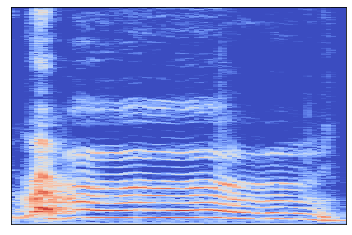

In [19]:
for dog in dogs:
    x2, sr2 = librosa.load(dog, sr = None)
    X2 = librosa.stft(x2)
    Xdb2 = librosa.amplitude_to_db(abs(X2))
    librosa.display.specshow(Xdb2, sr=sr2)
    plt.savefig('/Users/estebanzuniga/Project-5/original_data_specs/{}.png'.format(dog[:-4]))

### converting dog-test audio into spectrograms ###

In [20]:
path = os.getcwd()
file_name = '/Users/estebanzuniga/Project-5/cats_dogs/test/dogs/'
new_path = os.path.join(path, file_name)
os.chdir(new_path)

In [21]:
dogs_test = os.listdir()

In [22]:
len(dogs_test)

28

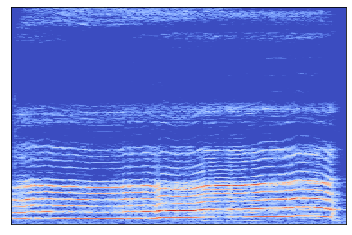

In [23]:
for dog in dogs_test:
    x3, sr3 = librosa.load(dog, sr = None)
    X3 = librosa.stft(x3)
    Xdb3 = librosa.amplitude_to_db(abs(X3))
    librosa.display.specshow(Xdb3, sr=sr3)
    plt.savefig('/Users/estebanzuniga/Project-5/original_data_specs/{}.png'.format(dog[:-4]))

### converting cat-test into spectrograms ###

In [24]:
path = os.getcwd()
file_name = '/Users/estebanzuniga/Project-5/cats_dogs/test/cats/'
new_path = os.path.join(path, file_name)
os.chdir(new_path)

In [25]:
cats_test = os.listdir()

In [26]:
len(cats_test)

39

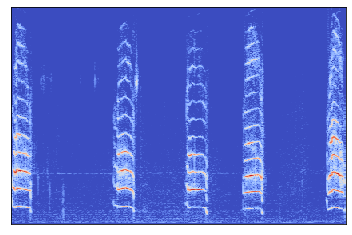

In [28]:
for cat in cats_test:
    x4, sr4 = librosa.load(cat, sr = None)
    X4 = librosa.stft(x4)
    Xdb4 = librosa.amplitude_to_db(abs(X4))
    librosa.display.specshow(Xdb4, sr=sr4)
    plt.savefig('/Users/estebanzuniga/Project-5/original_data_specs/{}.png'.format(cat[:-4]))
    